<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Вывод-1" data-toc-modified-id="Вывод-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод 1</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Вывод-2" data-toc-modified-id="Вывод-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод 2</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Вывод-3" data-toc-modified-id="Вывод-3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод 3</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод-4" data-toc-modified-id="Вывод-4-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод 4</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
Целевой признак
Exited — факт ухода клиента

## Подготовка данных

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.utils import shuffle
import random

In [145]:
data = pd.read_csv('Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [146]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [147]:
list(data.columns)
     

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [148]:
data = data.rename(columns={'RowNumber': 'row_number', 'CustomerId':'customer_id', 'Surname': 'surname' \
                            , 'CreditScore': 'credit_score', 'Geography': 'geography', 'Gender': 'gender'\
                            , 'Age': 'age', 'Tenure': 'tenure', 'Balance': 'balance', 'NumOfProducts': 'num_of_products'\
                           , 'HasCrCard': 'has_cr_card', 'IsActiveMember': 'is_active_member', 'EstimatedSalary': 'estimated_salary'\
                           , 'Exited': 'exited'})

Переименованы колонки в соответствии с рекомендациями.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [150]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [151]:
data['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [152]:
data['tenure'] = data['tenure'].fillna(random.randint(0, 10))

Выявлены пропуски данных только в колонке "tenure" - продолжительность обслуживания в банке. После исследования данных в колонке принято решение заменить пропуски рандомным значением.

In [153]:
data.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [154]:
data.duplicated().sum()

0

Полные дубликаты строк отсутствуют.

In [155]:
data['exited'].sum()

2037

Целевой признак - бинарная величина (0 или 1), положительных значений 20.37%.

In [156]:
data = data.drop(['surname'], axis=1)

In [157]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [158]:
data_ohe = data_ohe.drop(['row_number', 'customer_id'], axis=1)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Удаляем из датафрейма ненужные колонки с персональной идентификацией клиентов и дублирующую колонку с номерами строк. Преобразуем категориальные признаки с помощью техника прямого кодирования.

In [159]:
target = data_ohe['exited']
features = data_ohe.drop(['exited'] , axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

In [160]:
features_valid, features_test, target_valid, target_test = train_test_split(
features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

In [161]:
print('обучающая выборка', features_train.shape)
print('валидационная выборка', features_valid.shape)
print('тестовая выборка', features_test.shape)

обучающая выборка (6000, 11)
валидационная выборка (2000, 11)
тестовая выборка (2000, 11)


Разделяем датафрейм на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Выборки стратифицируются по целевому признаку.

In [162]:
target_train.mean()

0.20366666666666666

In [163]:
target_valid.mean()

0.204

In [164]:
target_test.mean()

0.2035

In [165]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


Выполняем стандартизацию численных данных.

## Вывод 1

Представленные данные изучены, выполнена обработка пропусков, удалены данные не представляющие интерес для анализа, преобразованы категориальные признаки, стандартизированны числовые показатели. Целевой признак - бинарная величина, положительная в 20.37% наблюдений. Было выполнено разделение данных на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 с одинаковой пропорцией положительных значений целевого признака. 
Данные пригодны для решения поставленной задачи бинарной классификации.

## Исследование задачи

Исследование и подбор параметров модели DecisionTreeClassifier

In [166]:
best_model = None
best_result = 0
for depth in range(1, 10):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model_1.fit(features_train, target_train) 
    predictions_valid_1 = model_1.predict(features_valid) 
    result_1 = f1_score(target_valid, predictions_valid_1) 
    if result_1 > best_result:
        best_model = model_1
        best_result = result_1
        best_depth = depth
print("F1 лучшей на валидационной выборке:", best_result, best_depth)

F1 лучшей на валидационной выборке: 0.5924855491329479 7


In [167]:
roc_auc_score(target_valid, model_1.predict_proba(features_valid)[:, 1])

0.8011742228298354

Исследование и подбор параметров модели RandomForestClassifier

In [168]:
best_model = None
best_result = 0
for depth in range(1, 10):
    for est in range(10, 100, 5):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_2.fit(features_train, target_train)
        predictions_valid_2 = model_2.predict(features_valid)
        result_2 = f1_score(target_valid, predictions_valid_2)
        if result_2 > best_result:
            best_model = model_2 
            best_result = result_2 
 
print("F1 на валидационной выборке:", best_result, depth, est)

F1 на валидационной выборке: 0.5929339477726575 9 95


In [169]:
roc_auc_score(target_valid, model_2.predict_proba(features_valid)[:, 1])


0.8740239186126713

Исследование модели LogisticRegression

In [170]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_3.fit(features_train, target_train)
predictions_valid_3 = model_3.predict(features_valid)
result_3 = f1_score(target_valid, predictions_valid_3)
print("F1 модели на валидационной выборке:", result_3)

F1 модели на валидационной выборке: 0.3107861060329068


In [171]:
roc_auc_score(target_valid, model_3.predict_proba(features_valid)[:, 1])


0.7875083136269584

Проверка моделей на адекватность 

In [172]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf_pred = dummy_clf.predict(features_valid)
dummy_result = f1_score(target_valid, dummy_clf_pred)
print(dummy_result)

0.0


In [173]:
roc_auc_score(target_valid, dummy_clf.predict_proba(features_valid)[:, 1])

0.5

## Вывод 2

Изучены следующие модели без учёта дисбаланса: DecisionTreeClassifier, RandomForestClassifier и LogisticRegression. Оценка проводилась расчётом F1-меры и AUC-ROC. Была выполнена проверка моделей на адекватность. Лучший результат на валидационной выборке показала модель RandomForestClassifier с параметрами: random_state=12345, n_estimators=95, max_depth=9. F1 = 0.5929339477726575, AUC-ROC = 0.8740239186126713

## Борьба с дисбалансом

Балансировка классов

In [174]:
best_model = None
best_result = 0
for depth in range(1, 10):
    model_1_b = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight='balanced') 
    model_1_b.fit(features_train, target_train) 
    predictions_valid_1_b = model_1_b.predict(features_valid) 
    result_1_b = f1_score(target_valid, predictions_valid_1_b) 
    if result_1_b > best_result:
        best_model = model_1_b
        best_result = result_1_b
        best_depth = depth
print("F1 лучшей на валидационной выборке:", best_result, best_depth)

F1 лучшей на валидационной выборке: 0.575925925925926 6


In [175]:
roc_auc_score(target_valid, model_1_b.predict_proba(features_valid)[:, 1])

0.7780854332939207

In [176]:
best_model = None
best_result = 0
for depth in range(1, 10):
    for est in range(10, 100, 5):
        model_2_b = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_2_b.fit(features_train, target_train)
        predictions_valid_2_b = model_2_b.predict(features_valid)
        result_2_b = f1_score(target_valid, predictions_valid_2_b)
        if result_2_b > best_result:
            best_model = model_2_b 
            best_result = result_2_b 

print("F1 на валидационной выборке:", best_result, depth, est)

F1 на валидационной выборке: 0.6469920544835414 9 95


In [177]:
roc_auc_score(target_valid, model_2_b.predict_proba(features_valid)[:, 1])

0.8710217755443885

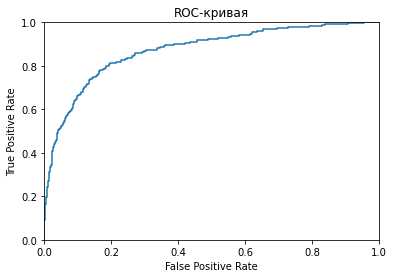

In [178]:
probabilities_valid = model_2_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [179]:
model_3_b = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model_3_b.fit(features_train, target_train)
predictions_valid_3_b = model_3_b.predict(features_valid)
result_3_b = f1_score(target_valid, predictions_valid_3_b)
print("F1 модели на валидационной выборке:", result_3_b)

F1 модели на валидационной выборке: 0.5289982425307558


In [180]:
roc_auc_score(target_valid, model_3_b.predict_proba(features_valid)[:, 1])

0.7936881096659769

Увеличение доли меньшего класса в обучающей выборке

In [181]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)


In [182]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(8444, 11)
(8444,)


In [183]:
best_model = None
best_result = 0
for depth in range(1, 10):
    model_5 = DecisionTreeClassifier(random_state=12345, max_depth = depth) 
    model_5.fit(features_upsampled, target_upsampled) 
    predictions_valid_5 = model_5.predict(features_valid) 
    result_5 = f1_score(target_valid, predictions_valid_5) 
    if result_5 > best_result:
        best_model = model_5
        best_result = result_5
        best_depth = depth
print("F1 лучшей на валидационной выборке:", best_result, best_depth)

F1 лучшей на валидационной выборке: 0.604951560818084 7


In [184]:
roc_auc_score(target_valid, model_5.predict_proba(features_valid)[:, 1])

0.8059784215193615

In [185]:
best_model = None
best_result = 0
for depth in range(1, 10):
    for est in range(10, 100, 5):
        model_6 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_6.fit(features_upsampled, target_upsampled)
        predictions_valid_6 = model_6.predict(features_valid)
        result_6 = f1_score(target_valid, predictions_valid_6)
        if result_6 > best_result:
            best_model = model_6 
            best_result = result_6

print("F1 на валидационной выборке:", best_result, depth, est)

F1 на валидационной выборке: 0.6541617819460726 9 95


In [186]:
roc_auc_score(target_valid, model_6.predict_proba(features_valid)[:, 1])

0.8729616218346636

In [195]:
model_7 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_7.fit(features_upsampled, target_upsampled)
predictions_valid_7 = model_7.predict(features_valid)
result_7 = f1_score(target_valid, predictions_valid_7)
print("F1 модели на валидационной выборке:", result_7)

F1 модели на валидационной выборке: 0.5261044176706827


In [196]:
roc_auc_score(target_valid, model_7.predict_proba(features_valid)[:, 1])

0.7926335106907084

## Вывод 3 

В качестве мер по борьбе с дисбалансом классов на тех же моделях были использованы методы балансировки классов и увеличения выборки (количество положительных значений целевого признака увеличено в 3 раза). Лучший результат показала модель RandomForestClassifier обученная на увеличенной выборке с параметрами: random_state=12345, n_estimators=95, max_depth=9. F1 на валидационной выборке составил 0.6541617819460726, AUC-ROC = 0.8729616218346636

## Тестирование модели

In [197]:
predictions_test = model_6.predict(features_test)
result_test = f1_score(target_test, predictions_test)
print("F1 модели на тестовой выборке:", result_test)

F1 модели на тестовой выборке: 0.6126340882002383


In [198]:
roc_auc_score(target_test, model_6.predict_proba(features_test)[:, 1])

0.8575817728360099

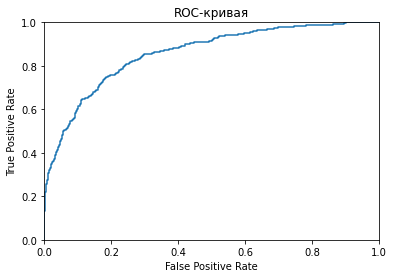

In [194]:
probabilities_test = model_6.predict_proba(features_test)
probabilities_one_valid_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

## Вывод 4

На тестовой выборке была исследована отобранная модель RandomForestClassifier с параметрами: random_state=12345, n_estimators=95, max_depth=9, обученная на обучающей выборке с увеличенной в 3 раза долей целевого показателя меньшего класса. Результат F1 оказался ниже, чем на валидационной выборке, однако удовлетворял заданным требованиям (0.6126340882002383 на тестовой выборке и 0.6541617819460726 на валидационной). Показатель AUC-ROC составил 0.8575817728360099 на тестовой выборке.

## Общий вывод

Для прогнозирования возможного ухода клиента из банка была выполнена задача бинарной классификации на основании представленных данных. После предварительной подготовки были изучены модели DecisionTreeClassifier, RandomForestClassifier и LogisticRegression, получены предварительные результаты. Оценивались метрики F1 и AUC-ROC. Учитывая дисбаланс классов целевого признака на тех же моделях были были применены методы балансировки классов и увеличения выборки. Лучший результат на валидационной выборке показала модель RandomForestClassifier, обученная на увеличенной выборке. 
На тестовой выборке выбранная модель показала несколько худший, но приемлимый результат (F1 = 0.6126340882002383, AUC-ROC = 0.8575817728360099). 